# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# План проекта

1. Подготовить данные.
        1.1. Открыть файлы и изучить их.
        1.2. Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между вашими расчётами и значением признака. Описать выводы.
        1.3. Проанализировать признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
        1.4. Провести предобработку данных.
2. Проанализировать данные
        2.1. Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Описать выводы.
        2.2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
        2.3. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили ли мы аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Описать выводы и удалить аномалии.
3. Построить модель
        3.1. Написать функцию для вычисления итоговой sMAPE.
        3.2. Обучить разные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы.

# 1. Подготовка данных

Загрузим все необходимые библиотеки и все три датасета, присвоив им имена.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from IPython.display import display

In [2]:
gr_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gr_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gr_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Посмотрим на все датасеты.

In [3]:
gr_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Переведем временной столбец в datetime.

In [5]:
gr_full['date'] = pd.to_datetime(gr_full['date'],format='%Y.%m.%d %H:%M:%S')
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant     

Заменим в названиях столбцов точки на подчеркивания для удобства.

In [6]:
gr_full.columns = gr_full.columns.str.replace(".","_") 
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final_output_concentrate_ag                           22627 non-null float64
final_output_concentrate_pb                           22629 non-null float64
final_output_concentrate_sol                          22331 non-null float64
final_output_concentrate_au                           22630 non-null float64
final_output_recovery                                 20753 non-null float64
final_output_tail_ag                                  22633 non-null float64
final_output_tail_pb                                  22516 non-null float64
final_output_tail_sol                                 22445 non-null float64
final_output_tail_au                                  22635 non-null float64
primary_cleaner_input_sulfate                         21107 non-null float64
primary_cleaner_input_depressant     

В общем массиве 87 колонок и 22716 записей. Во всех столбцах кроме даты есть пропуски - возможно это обусловлено технологическим процессом.

In [7]:
gr_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
gr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

Также обработаем столбец date.

In [9]:
gr_train['date'] = pd.to_datetime(gr_train['date'],format='%Y.%m.%d %H:%M:%S')
gr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant     

Заменим в названиях столбцов точки на подчеркивания для удобства.

In [10]:
gr_train.columns = gr_train.columns.str.replace(".","_") 
gr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final_output_concentrate_ag                           16788 non-null float64
final_output_concentrate_pb                           16788 non-null float64
final_output_concentrate_sol                          16490 non-null float64
final_output_concentrate_au                           16789 non-null float64
final_output_recovery                                 15339 non-null float64
final_output_tail_ag                                  16794 non-null float64
final_output_tail_pb                                  16677 non-null float64
final_output_tail_sol                                 16715 non-null float64
final_output_tail_au                                  16794 non-null float64
primary_cleaner_input_sulfate                         15553 non-null float64
primary_cleaner_input_depressant     

В обучающем массиве 75% от общего - само собой те же 87 столбцов, но уже с 16860 строками. С пропусками все также как и в общем массиве.

In [11]:
gr_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [12]:
gr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Также обработаем столбец date.

In [13]:
gr_test['date'] = pd.to_datetime(gr_test['date'],format='%Y.%m.%d %H:%M:%S')
gr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
ro

Заменим в названиях столбцов точки на подчеркивания для удобства.

In [14]:
gr_test.columns = gr_test.columns.str.replace(".","_") 
gr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner_input_sulfate                 5554 non-null float64
primary_cleaner_input_depressant              5572 non-null float64
primary_cleaner_input_feed_size               5856 non-null float64
primary_cleaner_input_xanthate                5690 non-null float64
primary_cleaner_state_floatbank8_a_air        5840 non-null float64
primary_cleaner_state_floatbank8_a_level      5840 non-null float64
primary_cleaner_state_floatbank8_b_air        5840 non-null float64
primary_cleaner_state_floatbank8_b_level      5840 non-null float64
primary_cleaner_state_floatbank8_c_air        5840 non-null float64
primary_cleaner_state_floatbank8_c_level      5840 non-null float64
primary_cleaner_state_floatbank8_d_air        5840 non-null float64
primary_cleaner_state_floatbank8_d_level      5840 non-null float64
ro

В тестовую выборку попало 25% от общей, но с другим количеством признаков - 53 столбца на 5856 строчек. Пропуски распределены также.
Отсутствуют разделы output - 30 колонок. Вероятно для сравнения с исходной выборкой после проверки модели на тестовой.
Также отсутсвуют разделы calculation - 4 колонки. Вероятно для проверки формул.

Теперь необходимо проверить правильность расчета эффективности обогащения. Вычилсим ее на обучающей выборке для признака rougher.output.recovery. 

Эффективность обогащения рассчитывается по формуле 

recovery = (C*(F-T)) / (F*(C-T)) * 100%

, где: 
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Соответственно целевой признак, который мы будем считать это rougher.output.recovery, С - rougher.output.concentrate_au, F - rougher.input.feed_au, T - rougher.output.tail_au. Приступим к подсчету.

In [15]:
C = gr_train['rougher_output_concentrate_au']
F = gr_train['rougher_input_feed_au']
T = gr_train['rougher_output_tail_au']

gr_train['eff_test'] = (C*(F-T)) / (F*(C-T)) * 100
gr_train['eff_test'].head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
Name: eff_test, dtype: float64

Найдем MAE между нашими расчетами и значением признака.

In [16]:
mae = mean_absolute_error(gr_train['rougher_output_recovery'], gr_train['eff_test'])
mae

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Так как мы не обрабатывали пропуски в данных нам датасетах, то теперь мы не можем воспользоваться формулой. Беглый взгляд на все датасеты позволяет понять, что наблюдения вносили ежечасно, и что разница между значениями соседних часов во всех признаках не столь существенна. Попробуем воспользоваться методом fillna(method='ffill') - подставляя в пропуски предыдущие значения и удаляя оставшиеся после этого нули, но пока только в нужном нам обучающем датасете.

In [17]:
gr_train = gr_train.fillna(method='ffill')
gr_train = gr_train.dropna()
gr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  16860 non-null datetime64[ns]
final_output_concentrate_ag                           16860 non-null float64
final_output_concentrate_pb                           16860 non-null float64
final_output_concentrate_sol                          16860 non-null float64
final_output_concentrate_au                           16860 non-null float64
final_output_recovery                                 16860 non-null float64
final_output_tail_ag                                  16860 non-null float64
final_output_tail_pb                                  16860 non-null float64
final_output_tail_sol                                 16860 non-null float64
final_output_tail_au                                  16860 non-null float64
primary_cleaner_input_sulfate                         16860 non-null float64
primary_cleaner_input_depressant     

Теперь запустим расчет заново.

In [18]:
C = gr_train['rougher_output_concentrate_au']
F = gr_train['rougher_input_feed_au']
T = gr_train['rougher_output_tail_au']

gr_train['eff_test'] = (C*(F-T)) / (F*(C-T)) * 100
gr_train['eff_test'].head(10)
mae = mean_absolute_error(gr_train['rougher_output_recovery'], gr_train['eff_test'])
mae

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Видимо, где-то еще остались нули. Найдем их.

In [19]:
gr_train['rougher_output_concentrate_au'].describe()

count    16860.000000
mean        17.337662
std          6.985496
min          0.000000
25%         17.400564
50%         19.631078
75%         21.219480
max         28.522811
Name: rougher_output_concentrate_au, dtype: float64

Не на входе.

In [20]:
gr_train['rougher_input_feed_au'].describe()

count    16860.000000
mean         7.144279
std          3.026064
min          0.000000
25%          6.186757
50%          7.429346
75%          8.954083
max         14.093363
Name: rougher_input_feed_au, dtype: float64

Но на выходе. Это не целевой признак, поэтому если мы уберем строчки со значением 0, то ничего критического не произойдет.

In [21]:
gr_train.query('rougher_input_feed_au == 0')
gr_train = gr_train.drop(gr_train[gr_train.rougher_input_feed_au == 0].index)
gr_train['rougher_input_feed_au'].describe()

count    15647.000000
mean         7.698124
std          2.367098
min          0.010000
25%          6.499680
50%          7.622841
75%          9.128722
max         14.093363
Name: rougher_input_feed_au, dtype: float64

Запустим расчет mae.

In [22]:
C = gr_train['rougher_output_concentrate_au']
F = gr_train['rougher_input_feed_au']
T = gr_train['rougher_output_tail_au']

gr_train['eff_test'] = (C*(F-T)) / (F*(C-T)) * 100
gr_train['eff_test'].head(10)
mae = mean_absolute_error(gr_train['rougher_output_recovery'], gr_train['eff_test'])
mae

59.56729809447104

Мы получили mae 59.5672. Достаточно большое отклонение. 

# 2. Анализ данных

Изучим как меняется концентрация металлов на различных этапах очистки. Для этого нам необходимо сравнить число Au, Ag, Pb на этапах rougher_input, rougher_output_concentrate,  primary_cleaner_output_concentrate, final_output_concentrate. Подготовим графики.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


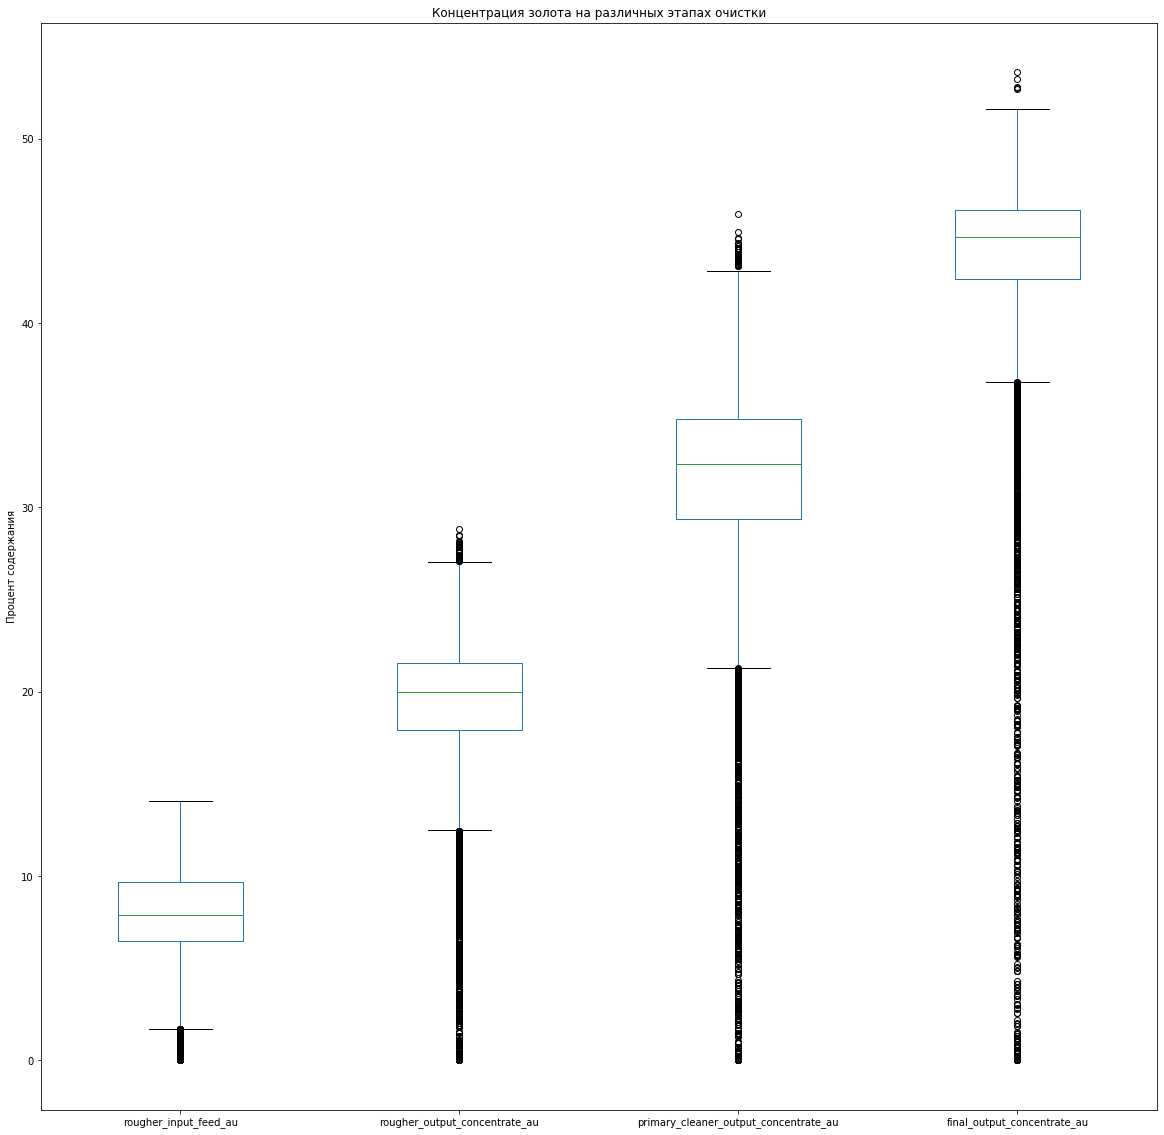

In [25]:
gr_full[["rougher_input_feed_au", "rougher_output_concentrate_au", 
          "primary_cleaner_output_concentrate_au", "final_output_concentrate_au"]].plot(kind='box', 
                                                                                        figsize = (20,20))
plt.title("Концентрация золота на различных этапах очистки")
plt.ylabel("Процент содержания")
plt.show()


Благодаря ящику с усами мы видим, что от начала к концу с золотом идет нормальное поступательное увеличение концентрации при обработке. Логичные цифры - от 8% до 43% на финальном этапе.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


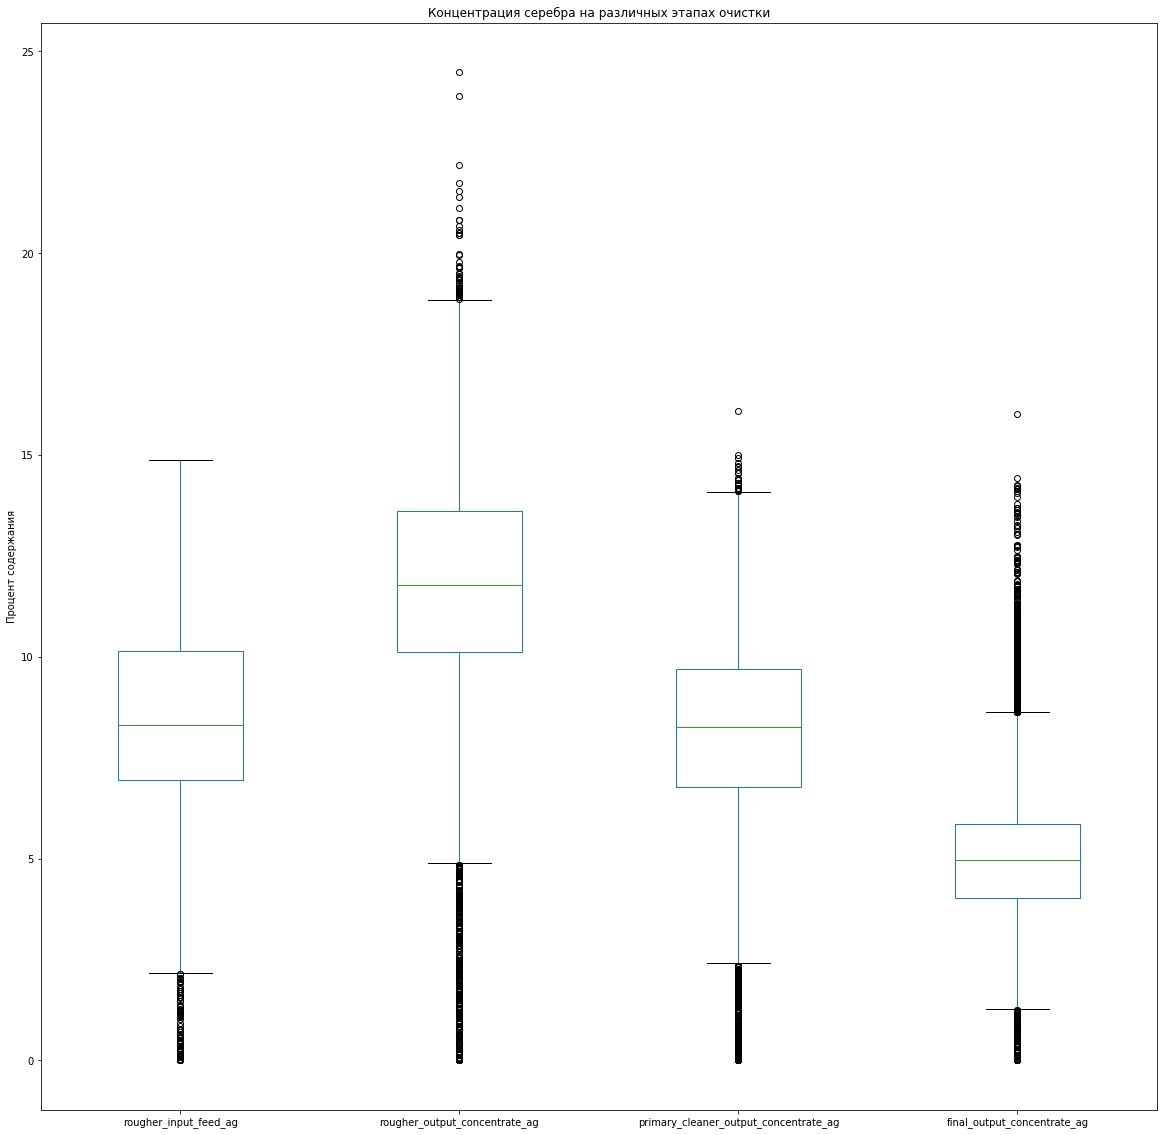

In [26]:
gr_full[["rougher_input_feed_ag", "rougher_output_concentrate_ag", 
          "primary_cleaner_output_concentrate_ag", "final_output_concentrate_ag"]].plot(kind='box', 
                                                                                        figsize = (20,20))
plt.title("Концентрация серебра на различных этапах очистки")
plt.ylabel("Процент содержания")
plt.show()


С серебром же немного другая ситуация. Здесь наибольшую эффективность показывают первый и второй этапы очистки. А вот третий и финальный неоптимальны. Вероятно, технология добычи серебра еще не идеальна.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


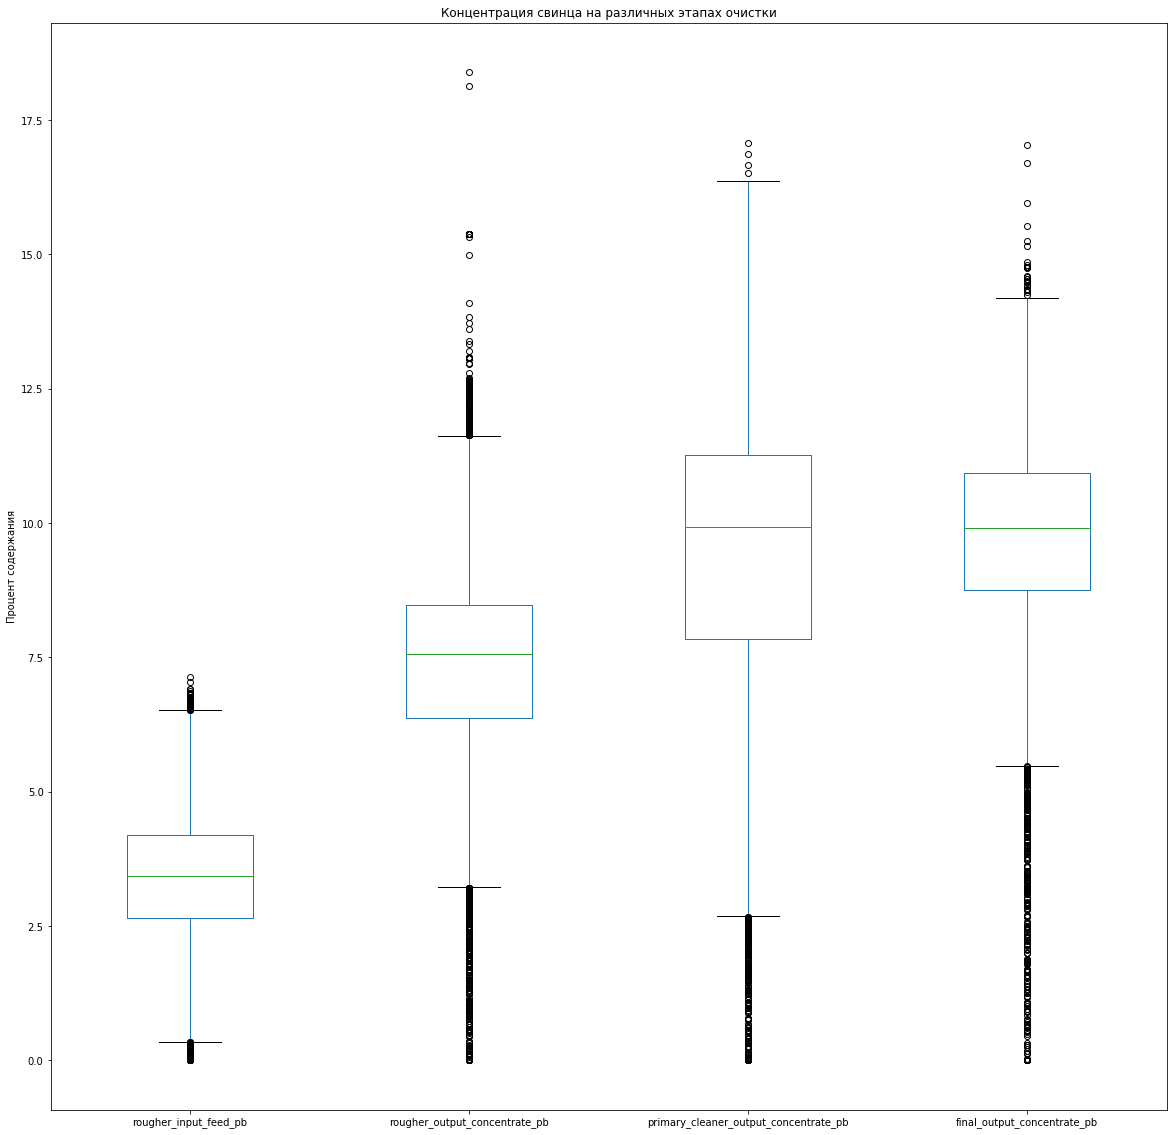

In [27]:
gr_full[["rougher_input_feed_pb", "rougher_output_concentrate_pb", 
          "primary_cleaner_output_concentrate_pb", "final_output_concentrate_pb"]].plot(kind='box', 
                                                                                        figsize = (20,20))
plt.title("Концентрация свинца на различных этапах очистки")
plt.ylabel("Процент содержания")
plt.show()

Свинец схож с золотом по распределнию, кроме финального этапа. То же поступательное движение.

Теперь нам необходимо сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, дальнейшая оценка модели будет неправильной. Для этого нам потребуется информация из столбцов primary_cleaner_input_feed_size и rougher_input_feed_size выборок gf_train и gf_test. Сначала посмотрим на флотацию, а потом на первичную очистку.

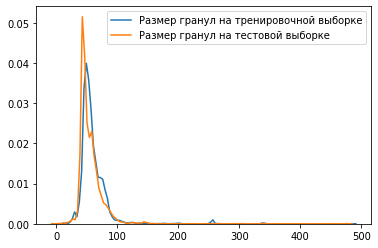

In [28]:
sns.kdeplot(data=gr_train['rougher_input_feed_size'], label = 'Размер гранул на тренировочной выборке')
sns.kdeplot(data=gr_test['rougher_input_feed_size'], label = 'Размер гранул на тестовой выборке')

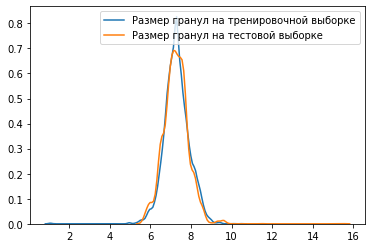

In [29]:
sns.kdeplot(data=gr_train['primary_cleaner_input_feed_size'], label = 'Размер гранул на тренировочной выборке')
sns.kdeplot(data=gr_test['primary_cleaner_input_feed_size'], label = 'Размер гранул на тестовой выборке')

Распределения практически одинаковые в обоих слуачаях, поэтому не должно быть расхождений в дальнейшей оценке моделей.

Исследуем суммарные концентрации всех веществ на разных стадиях на предмет аномальных значений: в сырье, в черновом и финальном концентратах. Для этого возьмем информацию из этапов rougher_input_feed, rougher_output_concentrate и final_output. Создадим столбец для суммы каждого вещества со всех этапов для всех датасетов, но посмотрим на распределение через ящик с усами только на общей выборке.

In [30]:
gr_full['total_au'] = gr_full['rougher_input_feed_au'] 
+ gr_full['rougher_output_concentrate_au'] + gr_full['final_output_concentrate_au']
gr_full['total_ag'] = gr_full['rougher_input_feed_ag'] 
+ gr_full['rougher_output_concentrate_ag'] + gr_full['final_output_concentrate_ag']
gr_full['total_pb'] = gr_full['rougher_input_feed_pb'] 
+ gr_full['rougher_output_concentrate_pb'] + gr_full['final_output_concentrate_pb']

0        16.990723
1        17.247751
2        17.430827
3        17.152634
4        17.382716
           ...    
22711    22.340236
22712    22.237567
22713    20.389501
22714    22.280964
22715    22.439980
Length: 22716, dtype: float64

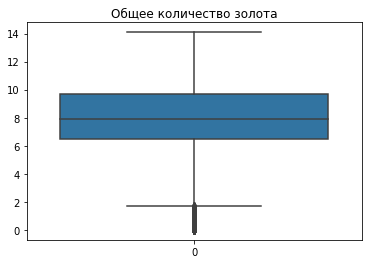

count    22617.000000
mean         7.565838
std          3.026954
min          0.000000
25%          6.485009
50%          7.884832
75%          9.668064
max         14.093363
Name: total_au, dtype: float64

In [31]:
sns.boxplot(data=gr_full['total_au'])
plt.title("Общее количество золота")
plt.show()
gr_full['total_au'].describe()

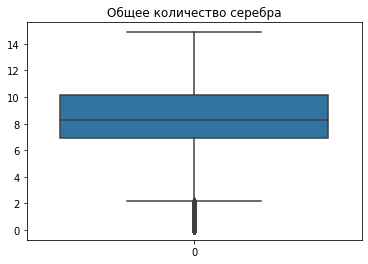

count    22618.000000
mean         8.065715
std          3.125250
min          0.000000
25%          6.944415
50%          8.302613
75%         10.135202
max         14.869652
Name: total_ag, dtype: float64

In [32]:
sns.boxplot(data=gr_full['total_ag'])
plt.title("Общее количество серебра")
plt.show()
gr_full['total_ag'].describe()

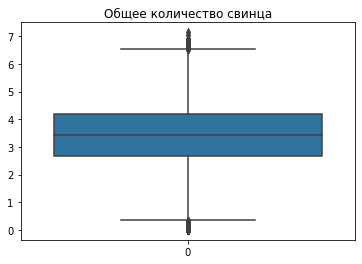

count    22472.000000
mean         3.305676
std          1.446905
min          0.000000
25%          2.658814
50%          3.432054
75%          4.204960
max          7.142594
Name: total_pb, dtype: float64

In [33]:
sns.boxplot(data=gr_full['total_pb'])
plt.title("Общее количество свинца")
plt.show()
gr_full['total_pb'].describe()

Среди всех трех металлов есть выбросы, необходимо их устранить. Сначала уберем их из меньших выборок, чтобы не потерять индексы.

In [34]:
gr_test.drop(gr_full.loc[gr_test.index].loc[gr_full['total_au'] <= 2].index, inplace=True)
gr_test.drop(gr_full.loc[gr_test.index].loc[gr_full['total_ag'] <= 2].index, inplace=True)
gr_test.drop(gr_full.loc[gr_test.index].loc[gr_full['total_pb'] <= 0.4].index, inplace=True)
gr_test.drop(gr_full.loc[gr_test.index].loc[gr_full['total_pb'] >= 6.5].index, inplace=True)
gr_train.drop(gr_full.loc[gr_train.index].loc[gr_full['total_au'] <= 2].index, inplace=True)
gr_train.drop(gr_full.loc[gr_train.index].loc[gr_full['total_ag'] <= 2].index, inplace=True)
gr_train.drop(gr_full.loc[gr_train.index].loc[gr_full['total_pb'] <= 0.4].index, inplace=True)
gr_train.drop(gr_full.loc[gr_train.index].loc[gr_full['total_pb'] >= 6.5].index, inplace=True)

Теперь из общей.

In [35]:
gr_full = gr_full.query('total_au > 2')
gr_full = gr_full.query('total_ag > 2')
gr_full = gr_full.query('total_pb > 0.4 and total_pb < 6.5')
gr_full

,date,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,...,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level,total_au,total_ag,total_pb
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,6.486150,6.100378,2.284912
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,6.478583,6.161113,2.266033
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,6.362222,6.116455,2.159622
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,6.118189,6.043309,2.037807
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,5.663707,6.060915,1.786875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,5.335862,6.091855,4.617558
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,4.838619,6.121323,4.144989
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,4.525061,5.970515,4.020002
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,4.362781,6.048130,3.902537


# 3. Модель

Теперь займемся построением модели. Напишем функцию для вычисления sMAPE.

In [38]:
def smape(y_true, y_pred):
    return  np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100/len(y_true) 

Напишем формулу для подсчета целевого показателя.

In [39]:
custom_scorer = make_scorer(smape, greater_is_better=False)

Теперь перейдем к поиску лучшей модели. Подготовим данные в обучающей и тестовой выборках. Ключевых признаков у нас два - rougher_output_recovery и final_output_recovery, поэтому потребуется два набора признаков.

In [40]:
features_train_r = gr_train.drop(['rougher_output_recovery', 'date', 'final_output_concentrate_ag', 
                                  'final_output_concentrate_pb', 'final_output_concentrate_sol', 
                                  'final_output_concentrate_au', 'final_output_recovery',                                 
                                  'final_output_tail_ag', 'final_output_tail_pb',                                  
                                  'final_output_tail_sol', 'final_output_tail_au',
                                  'primary_cleaner_output_concentrate_ag', 'primary_cleaner_output_concentrate_pb',                
                                  'primary_cleaner_output_concentrate_sol', 'primary_cleaner_output_concentrate_au',                 
                                  'primary_cleaner_output_tail_ag', 'primary_cleaner_output_tail_pb',                        
                                  'primary_cleaner_output_tail_sol', 'primary_cleaner_output_tail_au',
                                  'rougher_calculation_sulfate_to_au_concentrate', 'rougher_calculation_floatbank10_sulfate_to_au_feed',    
                                  'rougher_calculation_floatbank11_sulfate_to_au_feed', 'rougher_calculation_au_pb_ratio',                        
                                  'rougher_output_concentrate_ag', 'rougher_output_concentrate_pb',                         
                                  'rougher_output_concentrate_sol', 'rougher_output_concentrate_au',                         
                                  'rougher_output_recovery', 'rougher_output_tail_ag',                             
                                  'rougher_output_tail_pb', 'rougher_output_tail_sol',                              
                                  'rougher_output_tail_au', 'secondary_cleaner_output_tail_ag',
                                  'secondary_cleaner_output_tail_pb', 'secondary_cleaner_output_tail_sol',                    
                                  'secondary_cleaner_output_tail_au'], axis=1)
target_train_r = gr_train['rougher_output_recovery']


features_train_f = gr_train.drop(['rougher_output_recovery', 'date', 'final_output_concentrate_ag', 
                                  'final_output_concentrate_pb', 'final_output_concentrate_sol', 
                                  'final_output_concentrate_au', 'final_output_recovery',                                 
                                  'final_output_tail_ag', 'final_output_tail_pb',                                  
                                  'final_output_tail_sol', 'final_output_tail_au',
                                  'primary_cleaner_output_concentrate_ag', 'primary_cleaner_output_concentrate_pb',                
                                  'primary_cleaner_output_concentrate_sol', 'primary_cleaner_output_concentrate_au',                 
                                  'primary_cleaner_output_tail_ag', 'primary_cleaner_output_tail_pb',                        
                                  'primary_cleaner_output_tail_sol', 'primary_cleaner_output_tail_au',
                                  'rougher_calculation_sulfate_to_au_concentrate', 'rougher_calculation_floatbank10_sulfate_to_au_feed',    
                                  'rougher_calculation_floatbank11_sulfate_to_au_feed', 'rougher_calculation_au_pb_ratio',                        
                                  'rougher_output_concentrate_ag', 'rougher_output_concentrate_pb',                         
                                  'rougher_output_concentrate_sol', 'rougher_output_concentrate_au',                         
                                  'rougher_output_recovery', 'rougher_output_tail_ag',                             
                                  'rougher_output_tail_pb', 'rougher_output_tail_sol',                              
                                  'rougher_output_tail_au', 'secondary_cleaner_output_tail_ag',
                                  'secondary_cleaner_output_tail_pb', 'secondary_cleaner_output_tail_sol',                    
                                  'secondary_cleaner_output_tail_au'], axis=1)
target_train_f = gr_train['final_output_recovery']


In [42]:
gr_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
gr_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
gr_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

In [43]:
gr_full = gr_full.fillna(method='ffill')
gr_train = gr_train.fillna(method='ffill')
gr_test = gr_test.fillna(method='ffill')

In [44]:
features = gr_test.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

In [45]:
features_train_r = gr_train[features].reset_index(drop=True)
target_train_r = gr_train['rougher.output.recovery'].reset_index(drop=True)
target_train_f = gr_train['final.output.recovery'].reset_index(drop=True)

features_test = gr_test[features].reset_index(drop=True)
target_test_r = gr_full['rougher.output.recovery'].loc[gr_test.index].reset_index(drop=True)
target_test_f = gr_full['final.output.recovery'].loc[gr_test.index].reset_index(drop=True)

In [46]:
def smape(y_test, y_pred):
    err = abs(y_test - y_pred)
    scale = (abs(y_test) + abs(y_pred)) / 2
    
    return (err / scale).mean()

In [47]:
rf = RandomForestRegressor(random_state=42)
cross_val_score(rf,features_train_r, target_train_r , cv=5, scoring = custom_scorer).mean()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

-20.06480032479978

Теперь сделаем все то же самое для модели линейной регрессии.

In [49]:
lr = LinearRegression()

In [50]:
cross_val_score(lr,features_train_r, target_train_r , cv=5, scoring = custom_scorer).mean()

-20.70559844442473

И для модели дерева решений.

In [51]:
dt = DecisionTreeRegressor(random_state=42)

In [52]:
cross_val_score(dt,features_train_r, target_train_r , cv=5, scoring = custom_scorer).mean()

-27.917383232025866

Таким образом получается, что наименьший показатель выдала модель случчайного леса. На ее основе и посчитаем общий smape.

In [53]:
smape_rough = abs(cross_val_score(rf,features_train_r, target_train_r , cv=5, scoring = custom_scorer).mean())*100
smape_final = abs(cross_val_score(rf,features_train_r, target_train_f , cv=5, scoring = custom_scorer).mean())*100
smape_total = 0.25*smape_rough + 0.75*smape_final
print('Эффективность обогащения чернового концентрата:', smape_rough)
print('Эффективность обогащения финального концентрата:', smape_final)
print('Общая эффективность обогащения:', smape_total)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Эффективность обогащения чернового концентрата: 2006.480032479978
Эффективность обогащения финального концентрата: 1709.620636041948
Общая эффективность обогащения: 1783.8354851514555


Проверим эту модель на тестовой выборке.

In [54]:
smape_rough_test = abs(cross_val_score(rf, features_test, target_test_r , cv=5, scoring = custom_scorer).mean())*100
smape_final_test = abs(cross_val_score(rf, features_test, target_test_f , cv=5, scoring = custom_scorer).mean())*100
smape_total_test = 0.25*smape_rough + 0.75*smape_final
print('Эффективность обогащения чернового концентрата на тестовой выборке:', smape_rough_test)
print('Эффективность обогащения финального концентрата на тестовой выборке:', smape_final_test)
print('Общая эффективность обогащения на тестовой выборке:', smape_total_test)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Эффективность обогащения чернового концентрата на тестовой выборке: 1925.1854120178461
Эффективность обогащения финального концентрата на тестовой выборке: 1448.794074235947
Общая эффективность обогащения на тестовой выборке: 1783.8354851514555


Показатель общей эффективности обогащения на обучающей и на тестовой выборке схож, поэтому модель можно признать успешной.

Теперь попробуем построить константную модель(найти среднее абсолютное отклонение), чтобы понять, был ли смысл заниматься построением регрессной модели и какого она качества.

Эти показатели дают понять, что наша модель абсолютно легитимна.

In [56]:
pred_rougher_cons = pd.Series(target_train_r.mean(), index=target_test_r.index)
pred_final_cons = pd.Series(target_train_f.mean(), index=target_test_f.index)

print('smape чернового концентрата:', smape(target_test_r, pred_rougher_cons)*100)
print('smape финального концентрата:', smape(target_test_f, pred_final_cons)*100)
print('итоговый smape:', ((0.25 * smape(target_test_r, pred_rougher_cons) + 0.75 * smape(target_test_f, pred_final_cons)))*100)



smape чернового концентрата: 13.064807313576654
smape финального концентрата: 13.219327527820257
итоговый smape: 13.180697474259356


Показатели ниже более чем на 30%, чем у нашей модели, поэтому можно заключить, что исследование имело смысл и адекватно.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке